In [47]:
def sci_notation_latex(value):
    exponent = int(np.log10(value))
    mantissa = value / 10**exponent
    return f'{mantissa:.1f} \\times 10^{{{exponent}}}'

In [48]:
def read_dataLess300(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[1]))
                constant = float(parts[2])
                y = float(parts[3])
                if x < 300:
                    x_values.append(x + constant)
                    y_values.append(y)

    return x_values, y_values

In [49]:
def read_dataMore300(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[1]))
                constant = float(parts[2])
                y = float(parts[3])
                if x > 300:
                    x_values.append(x + constant)
                    y_values.append(y)

    return x_values, y_values

In [50]:
def read_dataAtlas_complete(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[0]))
                y = float(parts[3])
                x_values.append(x)
                y_values.append(y)

    return x_values, y_values

In [71]:
def graficador(alpha56, x_atlasc, y_atlasc, filtered_x_less_300, filtered_y_less_300, filtered_x_more_300, filtered_y_more_300, porcentaje_salta,
    porcentaje_baja):

    alpha56cristian = alpha56
    if(alpha56 == 4):
        alpha56 = 3.9e5
    elif(alpha56 == 5):
        alpha56 = 5.4e5
    elif(alpha56 == 6):
        alpha56 = 9.2e5

    # Filter the data to include only points where x > 10
    x_atlasc_filtered = [x for x in x_atlasc if x > 10]
    y_atlasc_filtered = [y for x, y in zip(x_atlasc, y_atlasc) if x > 10]

    filtered_x_less_300_filtered = [x for x in filtered_x_less_300 if x > 10]
    filtered_y_less_300_filtered = [y for x, y in zip(filtered_x_less_300, filtered_y_less_300) if x > 10]

    filtered_x_more_300_filtered = [x for x in filtered_x_more_300 if x > 10]
    filtered_y_more_300_filtered = [y for x, y in zip(filtered_x_more_300, filtered_y_more_300) if x > 10]
    # Plotting the data
    # Plotting the data
    plt.figure(figsize=(10, 6))

    porcentaje_salta= str(porcentaje_salta)

    porcentaje_baja= str(porcentaje_baja)
    # Split the string into words
    words = list(porcentaje_baja)

    #print(words)

    # Join the first three words back into a string
    shortened_porcentaje_baja = words[:3]

    words = list(porcentaje_salta)

    # Join the first three words back into a string
    shortened_porcentaje_salta = words[:3]

    shortened_porcentaje_salta = ''.join(shortened_porcentaje_salta)

    shortened_porcentaje_baja = ''.join(shortened_porcentaje_baja)

    #print(shortened_porcentaje_salta)

    # Scatter plot for each data set
    plt.scatter(x_atlasc_filtered, y_atlasc_filtered, alpha=0.5, label='Atlas C Data Points', color='red', marker='o')
    plt.scatter(filtered_x_less_300_filtered, filtered_y_less_300_filtered, alpha=0.5, label=f'Filtered X < 300 ({shortened_porcentaje_baja}%)', color='blue', marker='x')
    plt.scatter(filtered_x_more_300_filtered, filtered_y_more_300_filtered, alpha=0.5, label=f'Filtered X > 300 ({shortened_porcentaje_salta}%)', color='green', marker='x')

    M_4 = 10e6
    M_5 = 5.5e1
    M_6 = 7e1
    # Add the text to the plot
    # Adjust the y-axis limits to allow for more space below
    #plt.ylim(-1000, 6)
    plt.text(10, 1, f'$\\alpha_{{nb}}^{{56}} = {sci_notation_latex(alpha56)}$', fontsize=12, color='black')
    plt.text(10, 0.01, f'$M_{{4}} = {sci_notation_latex(M_4)}$', fontsize=12, color='black')
    plt.text(10, 0.0001, f'$M_{{5}} = {sci_notation_latex(M_5)}$', fontsize=12, color='black')
    plt.text(10, 0.000001, f'$M_{{6}} = {sci_notation_latex(M_6)}$', fontsize=12, color='black')

    # Add horizontal and vertical lines
    plt.axhline(y=0.1, color='black', linestyle='-')
    plt.axvline(x=300, color='black', linestyle='-')

    # Set log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Set labels and title
    plt.xlabel('delta z atlas')
    plt.ylabel(f'Error (no porcentual) deltaz atlas vs deltaz simple {alpha56cristian}')
    plt.title('Scatter Plot of X and Y Values (Log Scale)')

    # Show legend
    plt.legend(fontsize=12)

    # Show grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Save the plot to a file with higher quality
    plt.savefig(f'scatter_plot_combined{alpha56}.png', format='png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

PORCENTAJESaltavalla4 3.262642740619902
PORCENTAJEBajavalla4 1.3729508196721312


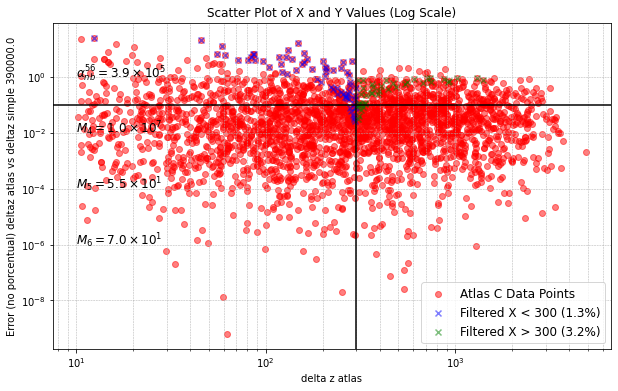

PORCENTAJESaltavalla5 2.678062678062678
PORCENTAJEBajavalla5 1.5690168818272097


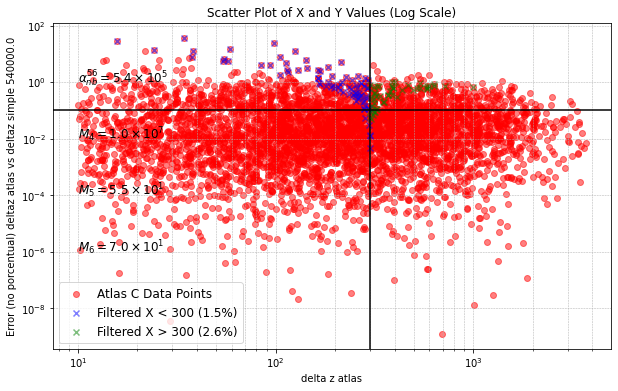

PORCENTAJESaltavalla6 2.503912363067293
PORCENTAJEBajavalla6 0.8144946808510639


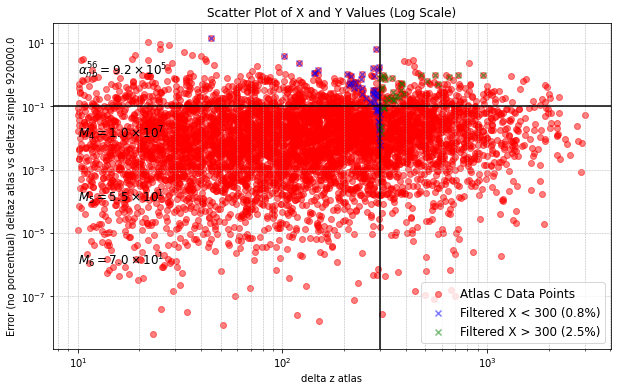

In [72]:
import matplotlib.pyplot as plt
import os
import numpy as np

for number_alpha56 in [4, 5, 6]:
    # Read the data from both files
    file_path_pt = f'eta_histoconstant{number_alpha56}.txt'

    #obtenemos los valores menores de 300
    x_values, y_values = read_dataLess300(file_path_pt)

    # Filter data where x_values are greater than 300
    filtered_x = [x for x in x_values if x > 300]
    filtered_y = [y for x, y in zip(x_values, y_values) if x > 300]

    filtered_x_more_300 = filtered_x
    filtered_y_more_300 = filtered_y

    

    x_values, y_values = read_dataMore300(file_path_pt)

    filtered_x = [x for x in x_values if x < 300]
    filtered_y = [y for x, y in zip(x_values, y_values) if x < 300]

    filtered_x_less_300 = filtered_x
    filtered_y_less_300 = filtered_y

    x_atlasc, y_atlasc = read_dataAtlas_complete(file_path_pt)

    filtered_x_atlas_more_300 = [x for x in x_atlasc if x > 300]

    filtered_x_atlas_less_300 = [x for x in x_atlasc if x < 300]

    porcentaje_salta = (len(filtered_x_more_300)/len(filtered_x_atlas_more_300))*100
    print(f"PORCENTAJESaltavalla{number_alpha56}", porcentaje_salta)

    porcentaje_baja = (len(filtered_x_less_300)/len(filtered_x_atlas_less_300))*100
    print(f"PORCENTAJEBajavalla{number_alpha56}", porcentaje_baja)

    graficador(
    number_alpha56,
    x_atlasc,
    y_atlasc,
    filtered_x_less_300,
    filtered_y_less_300,
    filtered_x_more_300,
    filtered_y_more_300,
    porcentaje_salta,
    porcentaje_baja
    )